In [1]:
import numpy as np
import random
import collections 
import matplotlib.pyplot as plt

In [2]:
#awards rewards based on winnings 
def check_win(configuration):
    wins = [[0,1,2,3],[4,5,6,7],[8,9,10,11],
            [12,13,14,15],[0,4,8,12],[1,5,9,13],
            [2,6,10,14],[3,7,11,15],[0,5,10,15],[3,6,9,12]]
    
    for i in range(10):
        if (configuration[wins[i][0]] == 1 and
            configuration[wins[i][1]] == 1 and
            configuration[wins[i][2]] == 1 and 
            configuration[wins[i][3]] == 1):
            return 1
    
    for i in range(10):
        if (configuration[wins[i][0]] == 2 and
            configuration[wins[i][1]] == 2 and
            configuration[wins[i][2]] == 2 and 
            configuration[wins[i][3]] == 2):
            return -1
    return 0  

In [3]:
#converts the board into an integer to store the values
def state_to_key(state):
    key = 0
    for i, elem in enumerate(state):
        key += int(elem * 3**(i))
    return key

In [4]:
#returns the next and reward given a state and action
def make_move(state,action,player):
    state[action]=player
    reward=check_win(state)
    return state,reward

In [5]:
#choosing an action based on e-greedy policy
def select_action(state,act_choices):
    global td_Q
    global td_Ct
    epsilon = 0.1 
    n = random.uniform(0,1) 
    if(n<epsilon):
        return random.choice(act_choices)
    else:
        act_chosen=-1
        q_val=-1000.0
        for act in act_choices:
            if (td_Q[state][act]!=0 and td_Q[state][act]>q_val):
                q_val=td_Q[state][act]
                act_chosen=act
        if (act_chosen<0):
            act_chosen = random.choice(act_choices)

    return act_chosen

In [6]:
#trains an agent using 1 million episodes
def off_policy_td_control():
    global win_list,loss_list,tie_list,x_axis
    wins = 0 
    loss = 0 
    tie = 0 
    global td_Q
    reward_list = []
    for i in range(1000001):  
        state = np.zeros(16)
        action_choices = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
        player=random.choice([0,1])
        reward=0
        reward_list.append(reward)
        while(reward==0 and len(action_choices)>0):
            state_key=state_to_key(state)
            action = select_action(state_key,action_choices)
            action_choices.remove(action)   
            player=player%2+1
            new_state,reward=make_move(state,action,player)
            new_state_key=state_to_key(new_state)
            alpha=0.1
            td_Q[state_key][action] += alpha * (reward + np.max(td_Q[new_state_key]) - td_Q[state_key][action])
            state=new_state
            
        if (reward==1):
            wins+=1
        elif (reward==-1):
            loss+=1
        else:
            tie+=1
            
        if (i>0 and (i%100000==0 or i==50000 or i==20000 or i==10000 or i==5000)):
            print("After ",i," episodes: ")
            total=wins+loss+tie
            win_pct=round(100*wins/total,2)
            loss_pct=round(100*loss/total,2)
            tie_pct=round(100*tie/total,2)
            if total>0:
                x_axis.append(i)
                win_list.append(win_pct)
                loss_list.append(loss_pct)
                tie_list.append(tie_pct)
            print("   wins: ",win_pct,"; loss: ", loss_pct,"; tie: ",tie_pct)
            wins = 0 
            loss = 0 
            tie = 0 
    
    return td_Q

In [7]:
td_Q = np.zeros([3**16,16])
win_list=[]
loss_list=[]
tie_list=[]
x_axis=[]
off_policy_td_control()

After  5000  episodes: 
   wins:  30.99 ; loss:  28.99 ; tie:  40.01
After  10000  episodes: 
   wins:  28.98 ; loss:  30.12 ; tie:  40.9
After  20000  episodes: 
   wins:  29.83 ; loss:  28.86 ; tie:  41.31
After  50000  episodes: 
   wins:  35.09 ; loss:  26.68 ; tie:  38.24
After  100000  episodes: 
   wins:  70.55 ; loss:  12.9 ; tie:  16.55
After  200000  episodes: 
   wins:  77.39 ; loss:  9.61 ; tie:  13.0
After  300000  episodes: 
   wins:  84.31 ; loss:  6.63 ; tie:  9.07
After  400000  episodes: 
   wins:  85.38 ; loss:  5.7 ; tie:  8.91
After  500000  episodes: 
   wins:  88.45 ; loss:  4.96 ; tie:  6.59
After  600000  episodes: 
   wins:  90.15 ; loss:  4.37 ; tie:  5.48
After  700000  episodes: 
   wins:  88.94 ; loss:  5.14 ; tie:  5.92
After  800000  episodes: 
   wins:  89.63 ; loss:  4.78 ; tie:  5.59
After  900000  episodes: 
   wins:  90.76 ; loss:  4.24 ; tie:  5.0
After  1000000  episodes: 
   wins:  90.66 ; loss:  4.35 ; tie:  4.99


array([[0.731699  , 1.        , 0.99999997, ..., 0.99871755, 0.99564621,
        0.99795689],
       [0.        , 0.49175244, 0.        , ..., 0.        , 0.        ,
        0.00245021],
       [0.        , 0.99997269, 0.        , ..., 0.79339647, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

[30.99, 28.98, 29.83, 35.09, 70.55, 77.39, 84.31, 85.38, 88.45, 90.15, 88.94, 89.63, 90.76, 90.66]
[28.99, 30.12, 28.86, 26.68, 12.9, 9.61, 6.63, 5.7, 4.96, 4.37, 5.14, 4.78, 4.24, 4.35]
[40.01, 40.9, 41.31, 38.24, 16.55, 13.0, 9.07, 8.91, 6.59, 5.48, 5.92, 5.59, 5.0, 4.99]
[5000, 10000, 20000, 50000, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000]


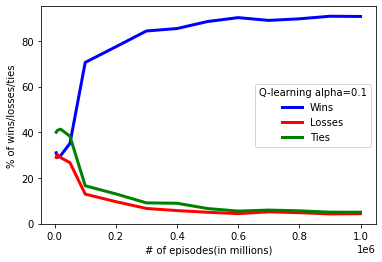

In [8]:
print(win_list)
print(loss_list)
print(tie_list)
print(x_axis)
plt.plot(x_axis,win_list,color='blue',linewidth=3,label='Wins')
plt.plot(x_axis,loss_list,color='red',linewidth=3,label='Losses')
plt.plot(x_axis,tie_list,color='green',linewidth=3,label='Ties')
plt.legend(title='Q-learning alpha=0.1')
plt.xlabel("# of episodes(in millions)")
plt.ylabel("% of wins/losses/ties")
plt.show()